In [ ]:
!git clone https://github.com/udacity/machine-learning/

Cloning into 'machine-learning'...
remote: Enumerating objects: 1967, done.
remote: Total 1967 (delta 0), reused 0 (delta 0), pack-reused 1967
Receiving objects: 100% (1967/1967), 35.44 MiB | 29.84 MiB/s, done.
Resolving deltas: 100% (1079/1079), done.


In [ ]:
!mv machine-learning/projects/titanic_survival_exploration/titanic_data.csv titanic_data.csv

In [ ]:
!mv machine-learning/projects/titanic_survival_exploration/visuals.py visuals.py

In [ ]:
import numpy as np
import pandas as pd
from IPython.display import display
import visuals as vs

In [ ]:
in_file='/content/titanic_data.csv'
full_data=pd.read_csv(in_file)
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
outcomes=full_data['Survived']
data=full_data.drop('Survived',axis=1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
def accuracy_score(truth,pred):
  if len(truth) == len(pred):
    return "Predictions have an accuracy of {:.2f}%".format((truth==pred).mean()*100)
  else:
    return "Number of predictions does not match number of outcomes"

predictions = pd.Series(np.ones(5,dtype=int))
print(accuracy_score(outcomes[:5],predictions))

Predictions have an accuracy of 60.00%


In [ ]:
def predictions_0(data):
  predictions=[]
  for _, passenger in data.iterrows():
    predictions.append(0)
  return pd.Series(predictions)

predictions=predictions_0(data)
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 61.62%


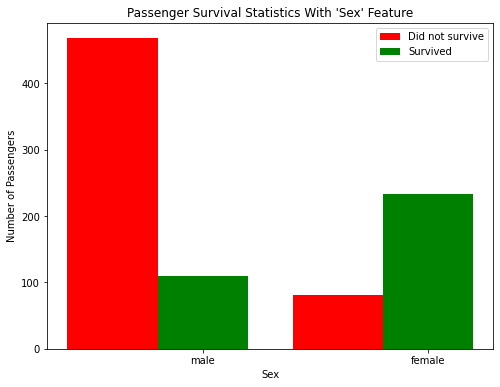

In [ ]:
vs.survival_stats(data,outcomes,'Sex')

In [ ]:
def predictions_1(data):
  predictions=[]
  for _, passenger in data.iterrows():
    if passenger['Sex']=='female':
      predictions.append(1)
    else:
      predictions.append(0)
  return pd.Series(predictions)

predictions=predictions_1(data)
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 78.68%


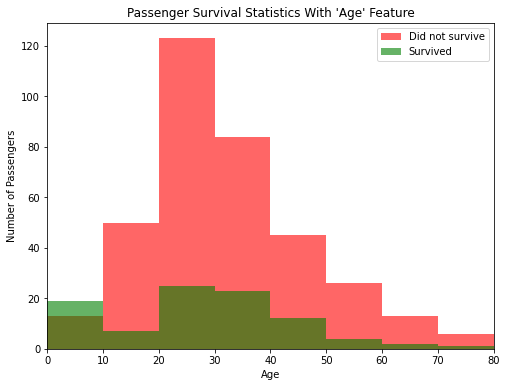

In [ ]:
vs.survival_stats(data,outcomes,'Age',["Sex == 'male'"])

In [ ]:
def predictions_2(data):
  predictions=[]
  for _, passenger in data.iterrows():
    if passenger['Sex']=='female' or (passenger['Sex']=='male' and passenger['Age'] < 10):
      predictions.append(1)
    else:
      predictions.append(0)
  return pd.Series(predictions)

predictions=predictions_2(data)
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 79.35%


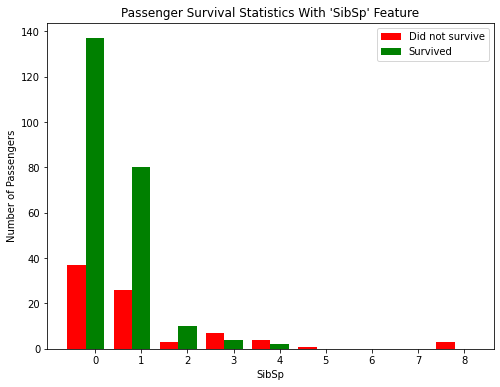

In [ ]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'" or "Age <15 " and "Pclass=3" and "Embarked != 'S' "])

In [ ]:
def predictions_3(data):
  predictions=[]
  for _, passenger in data.iterrows():
    if passenger['Sex']=='female' or passenger['Age'] < 16:
      if passenger['Pclass']==3:
        if passenger['Embarked']== 'C' or passenger['Embarked']== 'Q':
          if passenger['SibSp'] < 3:
            predictions.append(1)
          else:
            predictions.append(0)
        else:
          predictions.append(0)
      else:
        predictions.append(1)
    else:
      predictions.append(0)

        
  return pd.Series(predictions)

predictions=predictions_3(data)
print(accuracy_score(outcomes,predictions))

Predictions have an accuracy of 82.49%
